In [2]:
import pandas as pd

scores = pd.read_csv('student-scores.csv')
scores

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75


In [3]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

### To check for missing data

In [4]:
scores.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

### To check for duplicates

In [5]:
scores.duplicated().sum()

0

No duplicate in this data

## Visualization and Analysis

### Cleaning and preprocessing

Text(0.5, 1.0, 'Boxplot of Weekly self study hours')

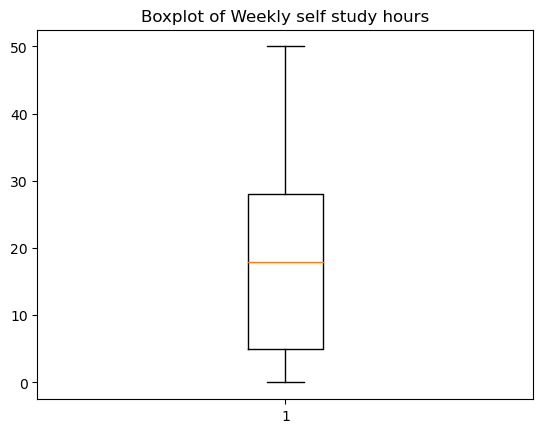

In [6]:
import matplotlib.pyplot as plt

plt.boxplot(scores['weekly_self_study_hours'])
plt.title('Boxplot of Weekly self study hours')

We can see that there are no outliers(values different from the rest of the data) in the plot above. The following can also be deduced from the plot:

1. The interquartile range (IQR) which represents the middle of the data(50%) falls close to 20.

2. The bottom of the box which is the first quartile (25% of the data) is between 0 and 10.

3. The top of the box which is the third quartile (75% of the data) is close to 30.

4. The top and bottom whiskers(thin straight line extending upwards and downwards from the box) extends to 50 from 0 to indicate the largest and smallest data points.

5. The range which the box covers is for 50% of the whole data, the rest is indicated by the whiskers.

6. We can observe that the data is however skewed towards the top whisker as the median is closer towards the bottom whisker

In [14]:
scores['average_score'] = scores[['math_score','history_score','physics_score','chemistry_score','biology_score','english_score','geography_score']].mean(axis=1)

scores['average_score']

0       82.000000
1       91.428571
2       86.428571
3       78.714286
4       74.428571
          ...    
1995    79.714286
1996    76.285714
1997    82.571429
1998    80.857143
1999    88.142857
Name: average_score, Length: 2000, dtype: float64

### Exploratory Data Analysis (EDA)

#### Descriptive statistics
For general overview of numerical columns

In [15]:
scores.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000,80.980357
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705,6.042224
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000,59.142857
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000,77.285714
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000,84.714286
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000,96.142857


#### Categorical variables
To examine distributions

In [19]:
print(scores['gender'].value_counts())

print(scores['part_time_job'].value_counts())

print(scores['extracurricular_activities'].value_counts())

female    1002
male       998
Name: gender, dtype: int64
False    1684
True      316
Name: part_time_job, dtype: int64
False    1592
True      408
Name: extracurricular_activities, dtype: int64


The gender is almost equal

About 16% (15.8) have part time jobs

Slightly over 20% (20.40) participate in extracurriculars 

#### Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

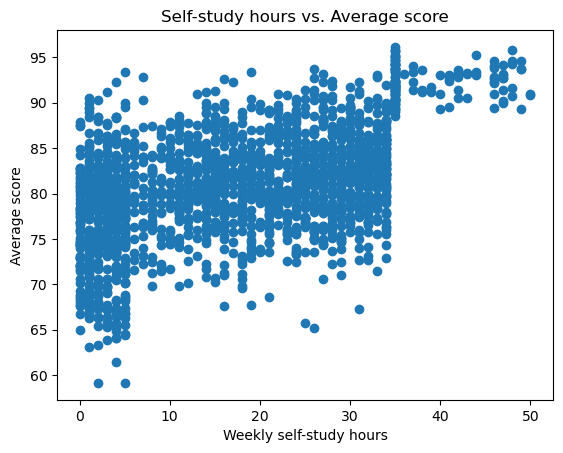

In [23]:
# How weekly self study hours impact students scores

plt.scatter(scores['weekly_self_study_hours'], scores['average_score'])
plt.xlabel('Weekly self-study hours')
plt.ylabel('Average score')
plt.title('Self-study hours vs. Average score')
plt.show

Due to the slight upward trend, we can suggest that more study hours impacts higher scores and also due to the positive correlation between them (points move upwards from left to right)

Text(0.5, 1.0, 'Average score by part-time jobs')

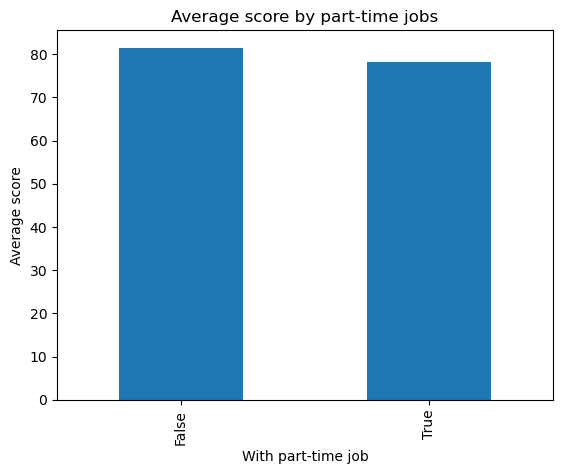

In [28]:
# Do students with part-time jobs perform differently compared to those without jobs?

job_group = scores.groupby('part_time_job')['average_score'].mean()
job_group.plot(kind='bar')
plt.xlabel('With part-time job')
plt.ylabel('Average score')
plt.title('Average score by part-time jobs')

Those with part-time jobs score slighly lower

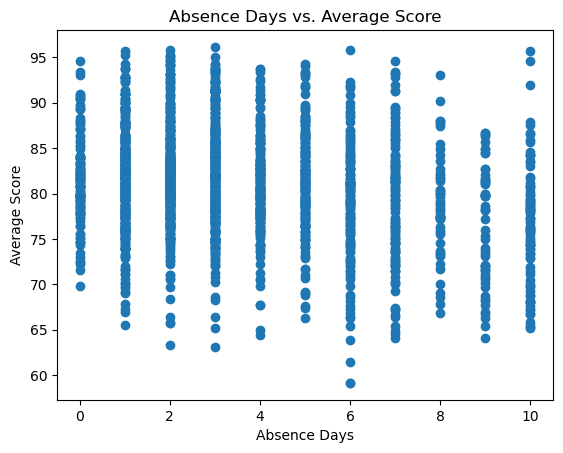

In [30]:
# Relationship between absence days and lower academic performance

plt.scatter(scores['absence_days'], scores['average_score'])
plt.xlabel('Absence Days')
plt.ylabel('Average Score')
plt.title('Absence Days vs. Average Score')
plt.show()

A slight downward trend shows that more absence days influences/causes for lower scores

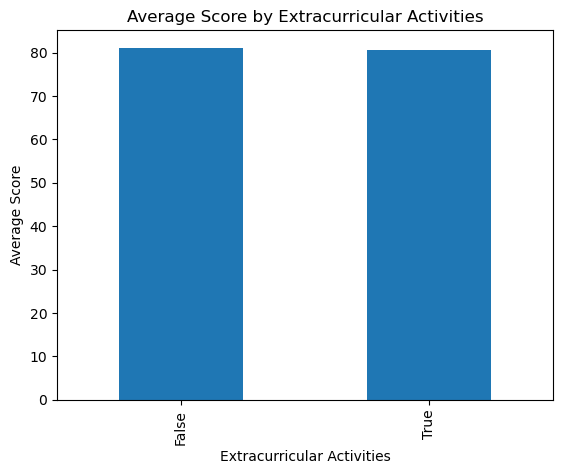

In [31]:
# Do extracurricular activities help or hurt student performance?

extra_group = scores.groupby('extracurricular_activities')['average_score'].mean()
extra_group.plot(kind='bar')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Score')
plt.title('Average Score by Extracurricular Activities')
plt.show()

Extracurriculars doesn't really have an impact on scores

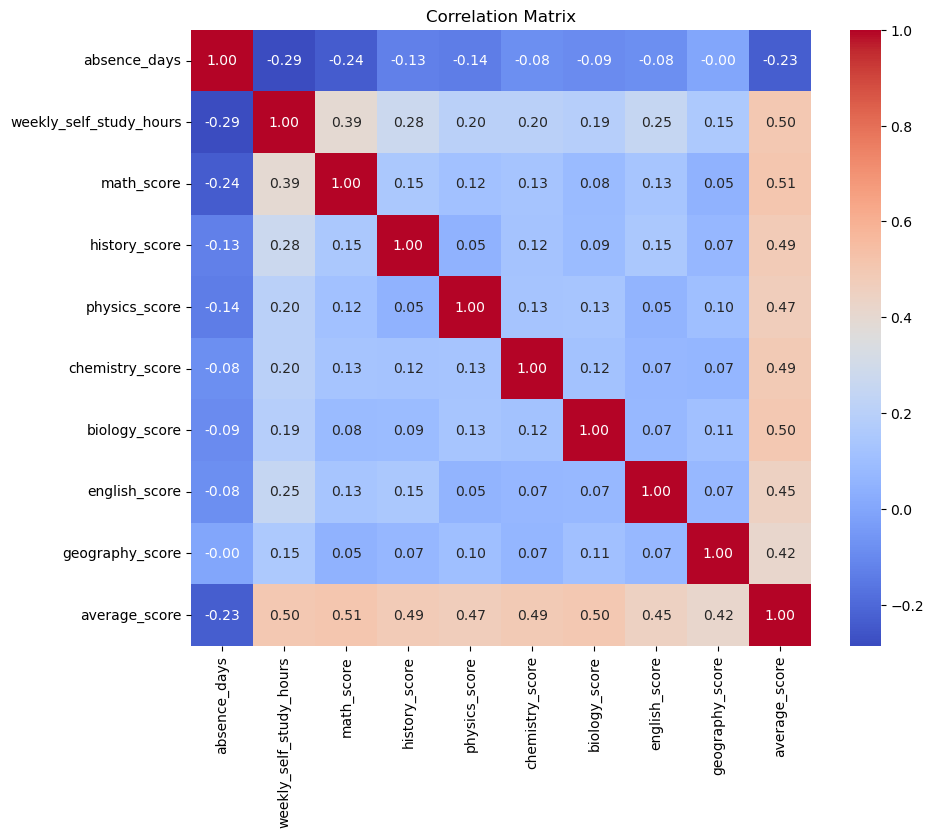

In [35]:
# Subject with the strongest correlation with overall academic success
# Here, correlation matrix is employed

import seaborn as sns

numerical_columns = ['absence_days', 'weekly_self_study_hours', 'math_score', 'history_score', 
                  'physics_score', 'chemistry_score', 'biology_score', 'english_score', 
                  'geography_score', 'average_score']
correlation_matrix = scores[numerical_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Understanding Correlation Coefficients:

A value of +1 indicates a perfect positive correlation (as one variable increases, the other increases proportionally)
A value of -1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally)
A value of 0 indicates no correlation

Inference:

So, we can see that weekly self-study hours and average score have a weak positive correlation of 0.18
Absence days and average score have a weak negative correlation of -0.12
Subject scores and average score have a moderate correlation